In [1]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
import numpy as np
import DQN.agents.basic as basic
import DQN.models.base as base
import maze_generator.maze_dataset as md
import maze_dataset
import Maze_env.wrappers.rewards as rw



In [14]:
dataset = md.Maze_dataset(5,(4,4),'dfs',)
maze = dataset[0]



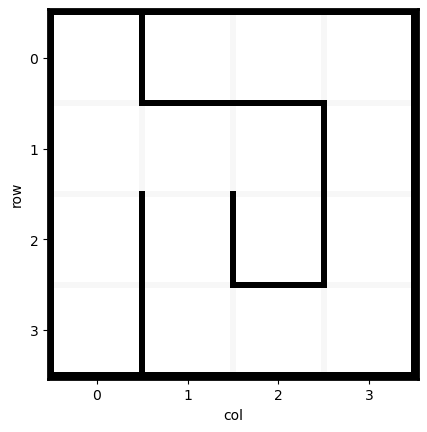

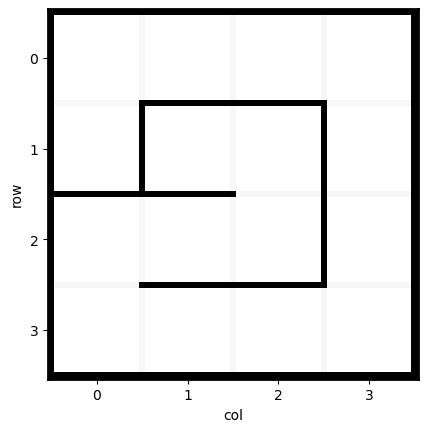

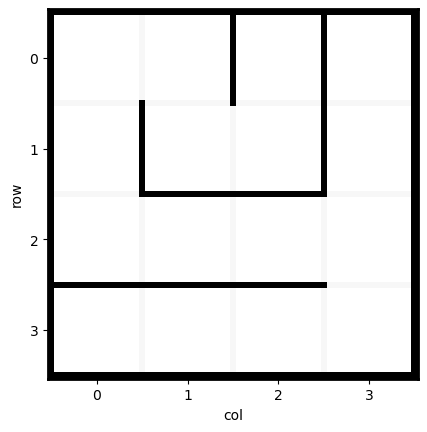

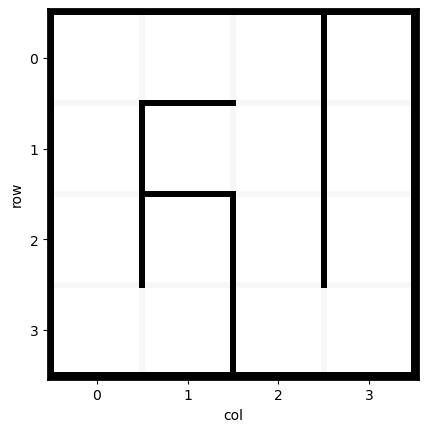

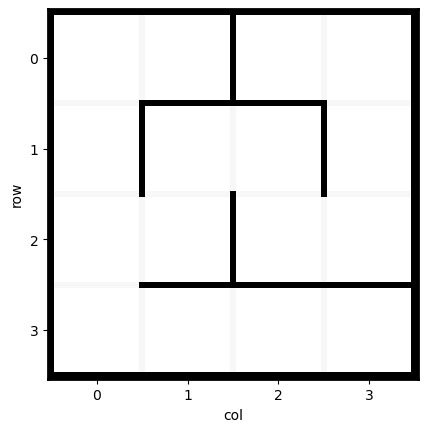

In [15]:
for i in range(len(dataset)):
    dataset.show_maze(i)

In [4]:
rewards = rw.reward_dist(GOAL = 75.0,
                         SEE_GOAL = 0.05,
                         DONT_SEE_GOAL = -0.01,
                         NEW_PLACE = 0.05,
                         OLD_PLACE = -0.5,
                         GET_CLOSER = 7.0, 
                         GET_CLOSER_CONSTANT = 3.1,
                         GET_FARTHER = -0.00,
                         GET_FARTHER_CONSTANT = -0.1,
                         DIST = 0.0)
mult_agent = basic.BaseAgent(base.basic_NN,vision=3,action_type='cardinal',
                               rewards_dist=rewards, dist_paradigm='path')
mult_agent.run_agent(maze,len_game=50,num_agents=1,epsilon=1,sample_prob=False,
                     start_dist=None)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


cumulative reward: [9.69222222]


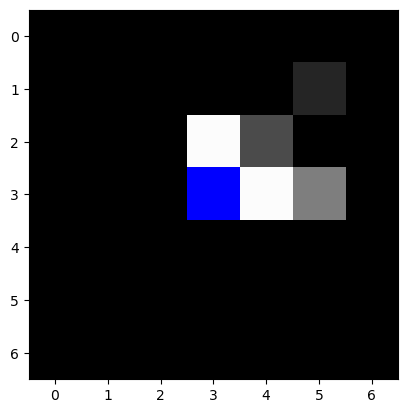

In [5]:
mult_agent.animate_last_replay(0,name='test18')

In [13]:
load = basic.BaseAgent.load('CodyTest_best')
testing_dataset = md.Maze_dataset(20,shape=(3,3),maze_type='dfs')
load.run_agent(testing_dataset[0],len_game=15,n_episodes=20,agents_pos = None, targets_pos =None,
               start_dist=None)

cumulative reward: [-185.12527778]
cumulative reward: [26.59314815]
cumulative reward: [-350.62494709]
cumulative reward: [19.195]
cumulative reward: [-432.93333333]
cumulative reward: [-357.07073413]
cumulative reward: [-185.12527778]
cumulative reward: [10.87]
cumulative reward: [10.87]
cumulative reward: [10.87]
cumulative reward: [26.59314815]
cumulative reward: [33.52675926]
cumulative reward: [-226.01555556]
cumulative reward: [-408.65493827]
cumulative reward: [10.87]
cumulative reward: [-185.7375]
cumulative reward: [26.59314815]
cumulative reward: [10.87]
cumulative reward: [-272.40462963]
cumulative reward: [-266.46203704]


In [7]:
load.test_agent(testing_dataset,n_episodes=1000,len_game=15,
                num_agents=1,start_dist=None)

0.429

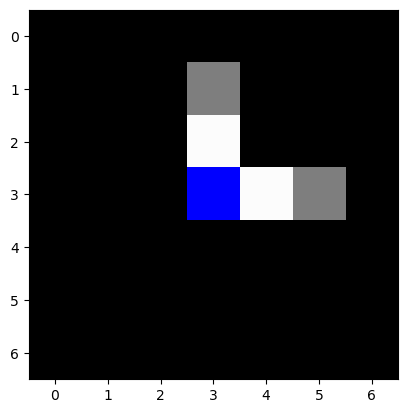

In [8]:
load.animate_last_replay(0,'vision')

In [9]:
#load.make_gif('None',testing_dataset,len_game=15,n_episodes=20,num_agents=1,
#              epsilon=0,frame_rate = 5)